---------------------------
#### Intuitions on ML - regression
----------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Generating sample data
np.random.seed(0)
X = 10 * np.random.rand(100, 1)          # Generate 100 random numbers between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1)  # y = 2*X + 1 + noise

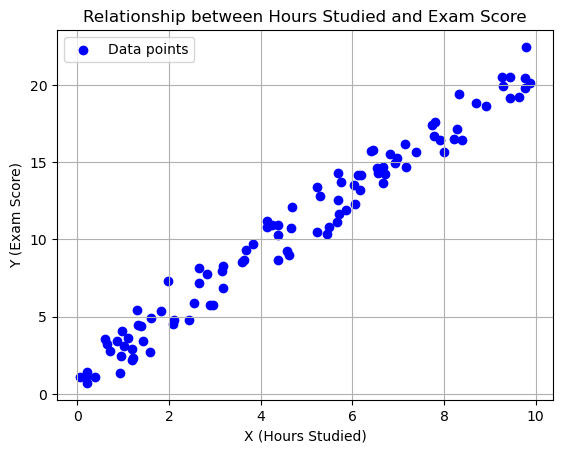

In [4]:
# Plotting the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X (Hours Studied)')
plt.ylabel('Y (Exam Score)')
plt.title('Relationship between Hours Studied and Exam Score')
plt.legend()
plt.grid(True)
plt.show()

#### Ex 02

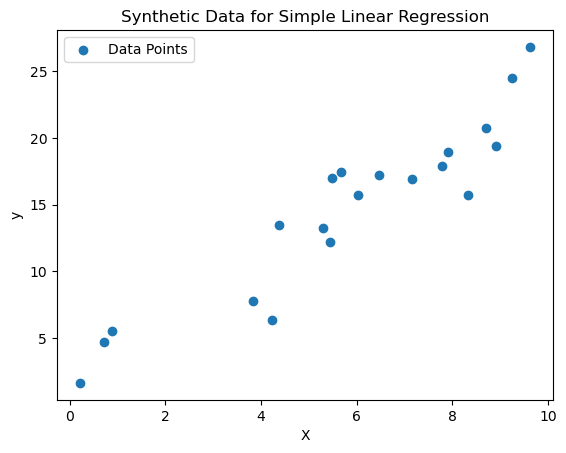

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.rand(20) * 10
y = 2 * X + 3 + np.random.randn(20) * 2

# Plot the data
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Simple Linear Regression')
plt.legend()
plt.show()

In [6]:
# Create a DataFrame
df = pd.DataFrame({'X': X, 'y': y})

In [7]:
df

,X,y
0,5.488135,16.964428
1,7.151894,16.893471
2,6.027634,15.681403
3,5.448832,12.189472
4,4.236548,6.367116
5,6.458941,17.225119
6,4.375872,13.480617
7,8.917730,19.351130
8,9.636628,26.812764
9,3.834415,7.760099


In [8]:
# Compute mean of each column
mean_X = np.mean(X)
mean_y = np.mean(y)

print('Mean of X : ', mean_X)
print('Mean of y : ', mean_y)

Mean of X :  5.815548245225974
Mean of y :  14.643082378446588


In [12]:
# Compute deviations of each sample (X, y)
df['deviations_X'] = df['X'] - mean_X
df['deviations_y'] = df['y'] - mean_y

In [13]:
df

,X,y,deviations_X,deviations_y
0,5.488135,16.964428,-0.327413,2.321346
1,7.151894,16.893471,1.336345,2.250388
2,6.027634,15.681403,0.212086,1.038321
3,5.448832,12.189472,-0.366716,-2.453610
4,4.236548,6.367116,-1.579000,-8.275966
5,6.458941,17.225119,0.643393,2.582037
6,4.375872,13.480617,-1.439676,-1.162466
7,8.917730,19.351130,3.102182,4.708048
8,9.636628,26.812764,3.821079,12.169682
9,3.834415,7.760099,-1.981133,-6.882983


In [14]:
# Compute covariance
df['covariance'] = df['deviations_X'] * df['deviations_y']

In [15]:
df

,X,y,deviations_X,deviations_y,covariance
0,5.488135,16.964428,-0.327413,2.321346,-0.760039
1,7.151894,16.893471,1.336345,2.250388,3.007296
2,6.027634,15.681403,0.212086,1.038321,0.220213
3,5.448832,12.189472,-0.366716,-2.453610,0.899779
4,4.236548,6.367116,-1.579000,-8.275966,13.067752
5,6.458941,17.225119,0.643393,2.582037,1.661264
6,4.375872,13.480617,-1.439676,-1.162466,1.673574
7,8.917730,19.351130,3.102182,4.708048,14.605219
8,9.636628,26.812764,3.821079,12.169682,46.501321
9,3.834415,7.760099,-1.981133,-6.882983,13.636106


The variables are:
- $\hat{y}$ (Predicted y) represents the predicted values of the dependent variable (savings in this case).
- $b$ (Intercept) is the $y$-intercept of the regression line.
- $m$ (Slope) is the coefficient of the independent variable (income in this case).
- $x$ represents the values of the independent variable (income).

So, the linear regression equation for the provided code is:

Predicted Savings $(\hat{y})=$ Intercept + Slope $\cdot$ Income

Substituting the computed values:
$$
\hat{y}=\text { Intercept }+ \text { Slope } \cdot x
$$

In [16]:
# Compute covariance
covariance = np.mean(df['deviations_X'] * df['deviations_y'])
covariance

16.6493228061914

In [17]:
# Compute slope (coefficient) and intercept for the linear regression model
slope = covariance / np.var(df['X'])
intercept = mean_y - slope * mean_X

print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 1.92458157807868
Slope: 2.1869822524142273


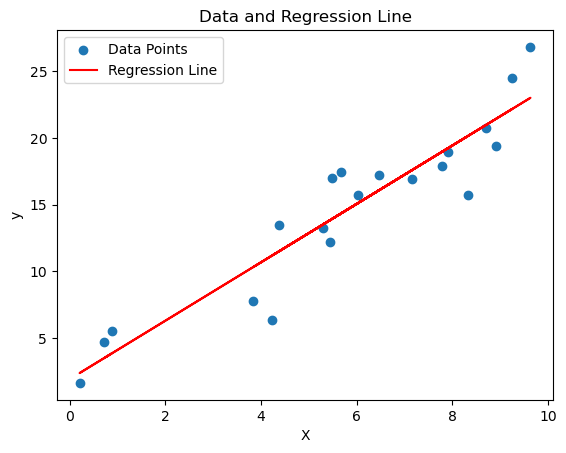

In [18]:
# Generate points for the regression line
regression_line = intercept + slope * X

# Plot the data points
plt.scatter(X, y, label='Data Points')

# Plot the regression line
plt.plot(X, regression_line, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Data and Regression Line')
plt.legend()
plt.show()